# MODEL REGULARIZATION

<b>Optimization is basically divided into two. Removing the variables that cause multiple linear regression or are unnecessary in estimating the target variable. The estimation parameters of the feature variables are weighted according to their importance in estimating the target variable, and in this way, the complexity of the model is balanced between error due to the bias of the model and error due to its variance. The technique is called regularization.

<b>The first of the mentioned regularization techniques is L1 and the second is L2.

# 1-) Lasso Regression

<b>The process of regularization the weights of the features towards zero using Lasso L1 regularization is called penalization or shrinkage.

# Cost Function
# $RSS = \sum_{j=1}^{n}(y_{j} - \hat{y}_{j})^{2}$
<b> n : number of observations

# Penalty Term
# $L1\sum_{j=1}^{p}\left| \beta _{j}\right|$
<b> p : number of features

# Lasso L1 regulation cost function
# $RSS_{LASSO} = \sum_{j=1}^{n}(y_{j} - \hat{y}_{j})^{2}+L1\sum_{j=1}^{p}\left| \beta _{j}\right|$

In [127]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [128]:
df = pd.read_csv(r'D:\githubProjects\Machine-Learning\Supervised Learning\Model Regularization\real_estate')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [129]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(191, 5)

<b>HOLD-OUT

In [130]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

<b> Lasso Model

In [131]:
lasso = Lasso(random_state=42)
lasso.fit(X_train,y_train)

Lasso(random_state=42)

In [132]:
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [133]:
print('Train R2 :',train_score)
print('Test R2 :',test_score)
print('Number of features with a weight greater than zero :',coeff_used)

Train R2 : 0.7324650909211012
Test R2 : 0.6862906745619393
Number of features with a weight greater than zero : 4


<b>The alpha parameter was used as 1. Now let's look at the model performance for different alpha values.

<b>alpha = 0.01

In [134]:
lasso001 = Lasso(alpha=0.01,random_state=42,max_iter=1000000)
lasso001.fit(X_train,y_train)

train_score001 = lasso001.score(X_train,y_train)
test_score001 = lasso001.score(X_test,y_test)

coeff_used001 = np.sum(lasso001.coef_ !=0)

print('Train R2 (alpha = 0.01) :',train_score001)
print('Test R2 (alpha = 0.01) :',test_score001)
print('Number of features with a weight greater than zero (alpha = 0.01) :',coeff_used001)

Train R2 (alpha = 0.01) : 0.7337398316689663
Test R2 (alpha = 0.01) : 0.6986142688656938
Number of features with a weight greater than zero (alpha = 0.01) : 4


<b>alpha = 0.001

In [135]:
lasso00001 = Lasso(alpha=0.0001,random_state=42,max_iter=1000000)
lasso00001.fit(X_train,y_train)

train_score00001 = lasso00001.score(X_train,y_train)
test_score00001 = lasso00001.score(X_test,y_test)

coeff_used00001 = np.sum(lasso00001.coef_ !=0)

print('Train R2 (alpha = 0.001) :',train_score00001)
print('Test R2 (alpha = 0.001) :',test_score00001)
print('Number of features with a weight greater than zero (alpha = 0.001) :',coeff_used00001)

Train R2 (alpha = 0.001) : 0.7337399616438325
Test R2 (alpha = 0.001) : 0.6987270960928149
Number of features with a weight greater than zero (alpha = 0.001) : 4


<b>Comparing the results with multiple linear regression

In [136]:
lr = LinearRegression().fit(X_train,y_train)
lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)

print('Train R2 :',lr_train_score)
print('Test R2 :',lr_test_score)

Train R2 : 0.733739961656849
Test R2 : 0.6987282352837991


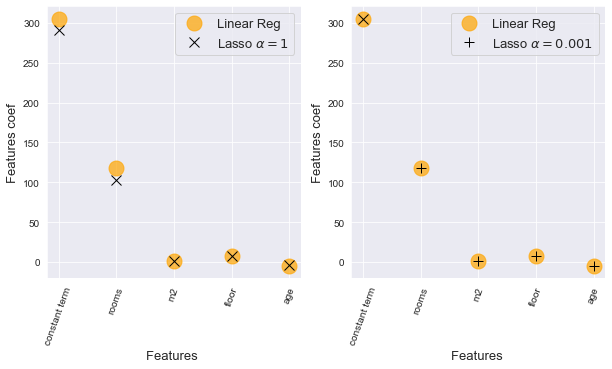

In [137]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),lasso.coef_,alpha=1,linestyle='none',marker='x',markersize=10,color='black',label=r'Lasso $ \alpha = 1$',zorder=7)

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,lasso.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)

plt.legend(fontsize=13,loc='upper right')

plt.subplot(1,2,2)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),lasso00001.coef_,alpha=1,linestyle='none',marker='+',markersize=10,color='black',label=r'Lasso $ \alpha = 0.001$')

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,lasso00001.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)
plt.legend(fontsize=13,loc='upper right')

plt.show()

<b>As the alpha value approaches zero, the estimation parameters of the model created with Lasso approach the estimation parameters of the multiple linear regression. As the L1 penalty coefficient increases, the narrowing in some parameter coefficients becomes visible.

In [138]:
lasso.coef_

array([103.4072838 ,   1.61924751,   7.08642243,  -4.05517555])

In [139]:
lasso00001.coef_

array([118.34915944,   1.13314119,   7.09688539,  -4.66564465])

In [140]:
lr.coef_

array([118.35066956,   1.13309207,   7.09688622,  -4.66570638])

# 2-)Ridge Regression

<b>The Ridge algorithm, on the other hand, aims to reduce the cost of the model by applying the L2 regularization technique. While estimating the feature coefficients, it weights the features according to their importance in estimating the target variable, as in Lasso/L1.It does not exclude any feature.

# $RSS_{RIDGE}=\sum_{j=1}^{n}(y_{j}-\hat{y}_{j})^{2} + L2\sum_{j=1}^{p}\left ( \beta _{j} \right )^2$

<b>Linear Model

In [141]:
lr= LinearRegression().fit(X_train,y_train)

<b>Ridge Model

In [142]:
rr = Ridge(alpha=0.01,random_state=42).fit(X_train,y_train)   # L2 = alpha = 0.01

rr100 =Ridge(alpha=100,random_state=42).fit(X_train,y_train)  # L2 = alpha = 100

In [143]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)

<b>alpha = 0.01 Ridge R2

In [144]:
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test,y_test)

<b>alpha = 100 Ridge R2

In [145]:
ridge_train_score100 = rr100.score(X_train,y_train)
ridge_test_score100= rr100.score(X_test,y_test)

In [146]:
print('Train R2 Lin.Reg : ',train_score)
print('Test R2 Lin.Reg : ',test_score)
print('Train R2 Ridge alpha = 0.01 :',ridge_train_score)
print('Test R2 Ridge alpha = 0.01 :',ridge_test_score)
print('Train R2 Ridge alpha = 100 :',ridge_train_score100)
print('Test R2 Ridge alpha = 100 :',ridge_test_score100)

Train R2 Lin.Reg :  0.733739961656849
Test R2 Lin.Reg :  0.6987282352837991
Train R2 Ridge alpha = 0.01 : 0.7337398851682211
Test R2 Ridge alpha = 0.01 : 0.698643301640363
Train R2 Ridge alpha = 100 : 0.6682250934479661
Test R2 Ridge alpha = 100 : 0.5584311823011989


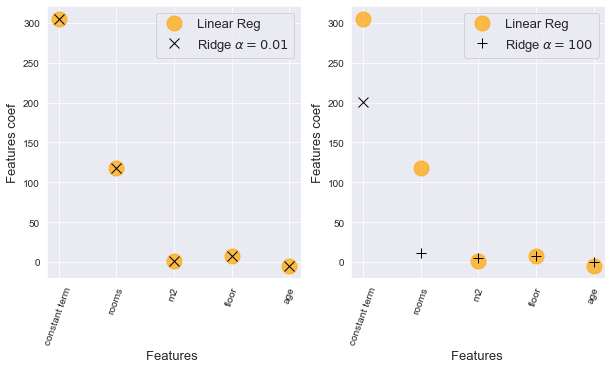

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),rr.coef_,alpha=1,linestyle='none',marker='x',markersize=10,color='black',label=r'Ridge $ \alpha = 0.01$',zorder=7)

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,rr.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)

plt.legend(fontsize=13,loc='upper right')

plt.subplot(1,2,2)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),rr100.coef_,alpha=1,linestyle='none',marker='+',markersize=10,color='black',label=r'Ridge $ \alpha = 100$')

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,rr100.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)
plt.legend(fontsize=13,loc='upper right')

plt.show()

<b>As in Lasso, the Ridge prediction parameters narrow as the alpha increases from 0 to 100. There is a significant narrowing in both the Lasso and Ridge model parameters constant term and number of rooms coefficients. This makes us think that the number of rooms feature may be the source of overimitation or overfitting.

# 3-)Elastic-Net Regression

<b>Elastic-Net is an algorithm that combines the features of Lasso and Ridge regressions and aims to minimize the cost function. It uses both L1 and L2 regularization techniques to penalize the model so that it does not make mistakes.

# $RSS_{ElasticNet}=\sum_{j=1}^{n}(y_{j}-\hat{y}_{j})^{2} + L\left (\eta \sum_{j=1}^{p}\left| \beta _{j}\right|+(1-\eta )\sum_{j=1}^{p}\left ( \beta _{j} \right )^2  \right )$

<b> L : alpha
<b> $\eta$ : L1_ratio
<b> $1-\eta$ : L2_ratio

In [148]:
enet = ElasticNet(alpha=1,random_state=42).fit(X_train,y_train)

train_score = enet.score(X_train,y_train)
test_score = enet.score(X_test,y_test)
coeff_used = np.sum(enet.coef_ !=0)

In [149]:
print('Train R2 alpha = 1 :',train_score)
print('Test R2 alpha = 1:',test_score)
print('Number of features with a weight greater than zero (alpha = 1) :',coeff_used)

Train R2 alpha = 1 : 0.670871407649752
Test R2 alpha = 1: 0.5627894869336407
Number of features with a weight greater than zero (alpha = 1) : 4


<b>alpha = 0.01

In [150]:
enet001 = ElasticNet(alpha=0.01,random_state=42).fit(X_train,y_train)

train_score001 = enet001.score(X_train,y_train)
test_score001 = enet001.score(X_test,y_test)
coeff_used001 = np.sum(enet001.coef_ !=0)

In [151]:
print('Train R2 aplha = 0.01:',train_score001)
print('Test R2 aplha = 0.01:',test_score001)
print('Number of features with a weight greater than zero (alpha = 0.01) :',coeff_used001)

Train R2 aplha = 0.01: 0.7333501064823666
Test R2 aplha = 0.01: 0.6923107858960038
Number of features with a weight greater than zero (alpha = 0.01) : 4


<b> alpha = 100

In [152]:
enet100 = ElasticNet(alpha=100,random_state=42).fit(X_train,y_train)

train_score100 = enet100.score(X_train,y_train)
test_score100 = enet100.score(X_test,y_test)
coeff_used100 = np.sum(enet100.coef_ !=0)

In [153]:
print('Train R2 aplha = 100:',train_score100)
print('Test R2 aplha = 100:',test_score100)
print('Number of features with a weight greater than zero (alpha = 100) :',coeff_used100)

Train R2 aplha = 100: 0.5844501052872215
Test R2 aplha = 100: 0.47748967369285467
Number of features with a weight greater than zero (alpha = 100) : 3


<b>For alpha = 100, the coefficient of one of the Elastic Net model features has become zero and the number of features has decreased to 3, but all features are still used.

<b>Linear Model

In [154]:
lr = LinearRegression().fit(X_train,y_train)

lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)

print('Train R2 :',lr_train_score)
print('Test R2 :',lr_test_score)

Train R2 : 0.733739961656849
Test R2 : 0.6987282352837991


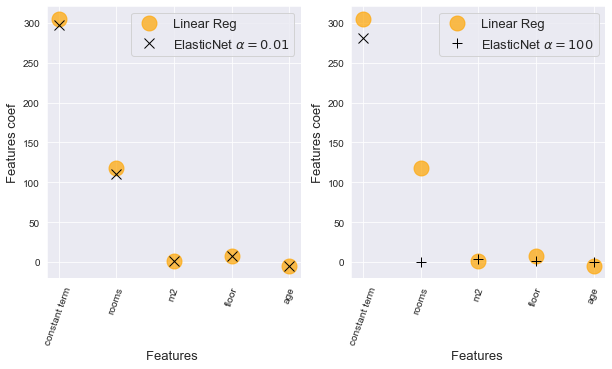

In [155]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),enet001.coef_,alpha=1,linestyle='none',marker='x',markersize=10,color='black',label=r'ElasticNet $ \alpha = 0.01$',zorder=7)

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,enet001.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)

plt.legend(fontsize=13,loc='upper right')

plt.subplot(1,2,2)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),enet100.coef_,alpha=1,linestyle='none',marker='+',markersize=10,color='black',label=r'ElasticNet $ \alpha = 100$')

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,enet100.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)
plt.legend(fontsize=13,loc='upper right')

plt.show()

In [156]:
enet100.intercept_

281.3000462397627

In [157]:
enet100_coef = pd.DataFrame(enet100.coef_,X.columns,columns=['ElasticNet (alpha=100) Features_coef'])
enet100_coef

,ElasticNet (alpha=100) Features_coef
rooms,0.000000
m2,4.233598
floor,0.927409
age,-0.114527


# A practical method that gives the best results by trying alternative values for hyperparameters is the Grid Search technique. So let's do it practically instead of trying it one by one by hand.

# 1-)Hyper Parameter Optimization with GridSearch for Lasso

In [158]:
lasso = Lasso(random_state=42).fit(X_train,y_train)

params = {'alpha' : [0.000000000000001, 0.0000000001, 0.00000001, 0.0001, 0.001, 0.01, 1, 2, 3, 4, 5, 10, 20, 30, 50]}


In [159]:
lasso_GS = GridSearchCV(estimator=lasso,param_grid=params,cv=5,scoring='r2').fit(X_train,y_train)

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+05, tolerance: 1.557e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+05, tolerance: 1.481e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [160]:
lasso_GS.best_params_

{'alpha': 1}

In [161]:
lasso_final = lasso.set_params(**lasso_GS.best_params_).fit(X_train,y_train)

In [162]:
lasso_final.score(X_test,y_test)

0.6862906745619393

<b>CROS-VALIDATION

In [163]:
all_accuracies = cross_val_score(lasso_final,X=X_train,y=y_train,cv=5)

all_accuracies.mean()

0.7070875030803956

In [164]:
lasso_final.intercept_

290.7383188226408

In [165]:
pd.DataFrame(lasso_final.coef_, X.columns, columns=['Lasso (alpha=1) features coef'])

,Lasso (alpha=1) features coef
rooms,103.407284
m2,1.619248
floor,7.086422
age,-4.055176


In [166]:
print('Train R2 :',lasso_final.score(X_train,y_train))
print('Test R2 :',lasso_final.score(X_test,y_test))

Train R2 : 0.7324650909211012
Test R2 : 0.6862906745619393


In [167]:
df['price_pred'] = lasso_final.predict(X)

df[['price','price_pred']].head()

,price,price_pred
0,475,434.584450
1,475,462.928338
2,450,446.721749
3,450,465.959585
4,475,452.798357


<b>Let's look at the real prices and estimated prices of the houses with a graph.

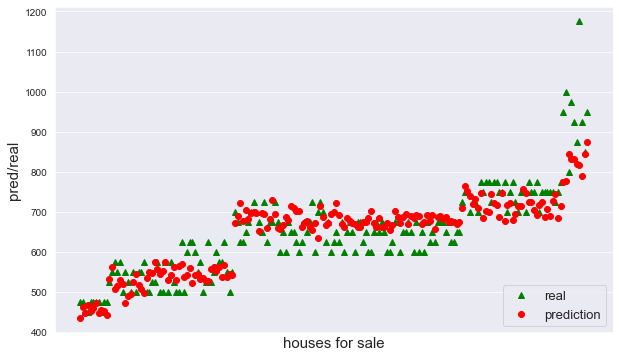

In [168]:
plt.figure(figsize=(10,6))
plt.xticks(df['price'],df.index.values) # Location, labels
plt.plot(df['price'],'g^',label='real')
plt.xticks(df['price_pred'],df.index.values)
plt.plot(df['price_pred'],'ro',label='prediction')
plt.xlabel('houses for sale',fontsize=15)
plt.ylabel('pred/real',fontsize=15)
plt.legend(fontsize=13,loc='lower right')
plt.show()

<b> example

In [169]:
rooms = 3
m2 = 105
floor = 4
age = 8

lasso_final.predict([[rooms,m2,floor,age]])

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([766.88544391])

# 2-)Hyper Parameter Optimization with GridSearch for Ridge

In [170]:
ridge = Ridge(random_state=42)

params = {'alpha' : [0.000000000000001, 0.0000000001, 0.00000001, 0.0001, 0.001, 0.01, 1, 2, 3, 4, 5, 10, 20, 30, 50]}

ridge_GS = GridSearchCV(ridge,params,scoring='r2',cv=5).fit(X_train,y_train)

print(ridge_GS.best_params_)
print(ridge_GS.best_estimator_)
print(ridge_GS.best_score_)

{'alpha': 1}
Ridge(alpha=1, random_state=42)
0.7071772649347372


In [171]:
all_accuracies = cross_val_score(ridge_GS.best_estimator_,X=X_train,y=y_train,cv=5)

print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[0.59028756 0.86202159 0.75828323 0.58997173 0.73532222]
0.7071772649347372
0.10467192818729874


In [172]:
ridge_final = ridge.set_params(**ridge_GS.best_params_).fit(X_train,y_train)

In [173]:
pd.DataFrame(ridge_final.coef_,X.columns,columns=['Ridge (alpha=1) features coef'])

,Ridge (alpha=1) features coef
rooms,107.776167
m2,1.478146
floor,7.135185
age,-4.234666


In [174]:
ridge_train_score = ridge_final.score(X_train,y_train)
ridge_test_score = ridge_final.score(X_test,y_test)

print('Test R2 :',ridge_test_score)
print('Train R2 :',ridge_train_score)

Test R2 : 0.6904116932614515
Train R2 : 0.7331046122177594


In [175]:
df['price_pred'] = ridge_final.predict(X)
df['price_pred'].head()

0    436.204755
1    462.611617
2    446.751552
3    465.512136
4    453.631191
Name: price_pred, dtype: float64

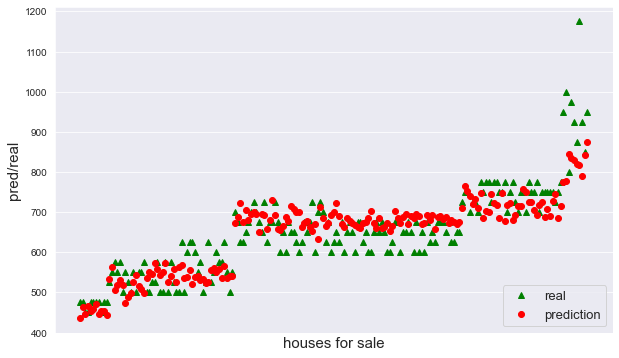

In [176]:
plt.figure(figsize=(10,6))
plt.xticks(df['price'],df.index.values) # Location, labels
plt.plot(df['price'],'g^',label='real')
plt.xticks(df['price_pred'],df.index.values)
plt.plot(df['price_pred'],'ro',label='prediction')
plt.xlabel('houses for sale',fontsize=15)
plt.ylabel('pred/real',fontsize=15)
plt.legend(fontsize=13,loc='lower right')
plt.show()

# 3-)Hyper Parameter Optimization with GridSearch for ElasticNet

In [178]:
enet = ElasticNet(random_state=42)

params = {'alpha' : [0.000000000000001, 0.0000000001, 0.00000001, 0.0001, 0.001, 0.01, 1, 2, 3, 4, 5, 10, 20, 30, 50]}

In [179]:
enet_GS = GridSearchCV(enet,params,scoring='r2',cv=5).fit(X_train,y_train)

print(enet_GS.best_params_)
print(enet_GS.best_estimator_)
print(enet_GS.best_score_)

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.947e+05, tolerance: 1.557e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e+05, tolerance: 1.481e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

{'alpha': 0.01}
ElasticNet(alpha=0.01, random_state=42)
0.7073610834707613


In [180]:
enet_GS.best_params_

{'alpha': 0.01}

In [181]:
enet_GS.best_estimator_

ElasticNet(alpha=0.01, random_state=42)

In [183]:
enet_GS.best_score_

0.7073610834707613

In [184]:
all_accuracies = cross_val_score(enet_GS.best_estimator_,X=X_train,y=y_train,cv=5)

print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[0.58966797 0.86205089 0.75871268 0.59061914 0.73575473]
0.7073610834707613
0.10474012760014134


In [185]:
enet_GS.best_estimator_.intercept_

296.9768160015012

In [186]:
enet_final = enet.set_params(**enet_GS.best_params_).fit(X_train,y_train)

pd.DataFrame(enet_final.coef_,X.columns,columns=['ElasticNet (alpha=0.01) features coef'])

,ElasticNet (alpha=0.01) features coef
rooms,110.067352
m2,1.403373
floor,7.126647
age,-4.328035


In [187]:
enet_train_score = enet_final.score(X_train,y_train)
enet_test_score = enet_final.score(X_test,y_test)

print('Test R2 :',enet_test_score)
print('Train R2 :',enet_train_score)

Test R2 : 0.6923107858960038
Train R2 : 0.7333501064823666


In [188]:
df['price_pred'] = enet_final.predict(X)

df['price_pred'].head()

0    437.210859
1    462.589482
2    446.916549
3    465.388095
4    454.152981
Name: price_pred, dtype: float64

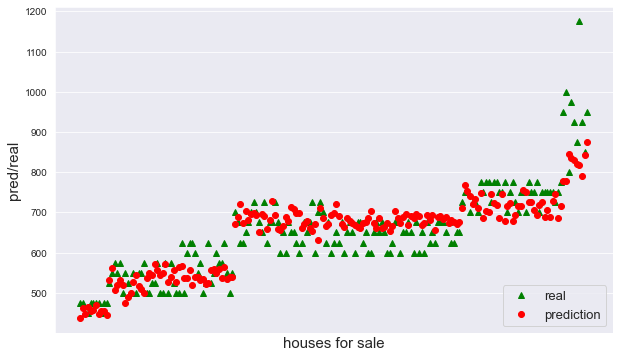

In [189]:
plt.figure(figsize=(10,6))
plt.xticks(df['price'],df.index.values) # Location, labels
plt.plot(df['price'],'g^',label='real')
plt.xticks(df['price_pred'],df.index.values)
plt.plot(df['price_pred'],'ro',label='prediction')
plt.xlabel('houses for sale',fontsize=15)
plt.ylabel('pred/real',fontsize=15)
plt.legend(fontsize=13,loc='lower right')
plt.show()